# 2020年8月28日
### 657.机器人能否返回原点
在二维平面上，有一个机器人从原点 (0, 0) 开始。给出它的移动顺序，判断这个机器人在完成移动后是否在 (0, 0) 处结束。

移动顺序由字符串表示。字符 move[i] 表示其第 i 次移动。机器人的有效动作有 R（右），L（左），U（上）和 D（下）。如果机器人在完成所有动作后返回原点，则返回 true。否则，返回 false。

注意：机器人“面朝”的方向无关紧要。 “R” 将始终使机器人向右移动一次，“L” 将始终向左移动等。此外，假设每次移动机器人的移动幅度相同。

 

示例 1:

输入: "UD"
输出: true
解释：机器人向上移动一次，然后向下移动一次。所有动作都具有相同的幅度，因此它最终回到它开始的原点。因此，我们返回 true。
示例 2:

输入: "LL"
输出: false
解释：机器人向左移动两次。它最终位于原点的左侧，距原点有两次 “移动” 的距离。我们返回 false，因为它在移动结束时没有返回原点。

来源：力扣（LeetCode）
链接：https://leetcode-cn.com/problems/robot-return-to-origin
著作权归领扣网络所有。商业转载请联系官方授权，非商业转载请注明出处。

#### 思路

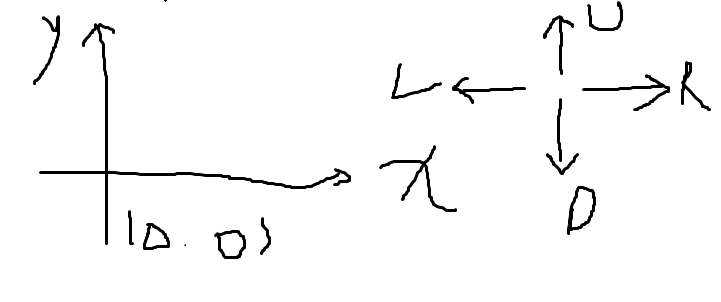

机器人在平面上移动改变的是机器人的位置，两个维度，假设机器人当前坐标点是(x,y)，向右移动x + 1,向左移动x - 1,向上移动y + 1,向下移动y - 1,最后如果机器人的坐标点等于原点，那么他就回到了原来的位置。

C++ 代码：

In [ ]:
class Solution {
public:
    bool judgeCircle(string moves) {
        int x = 0, y = 0;
        for(int i = 0; i < moves.length(); ++i){
            if (moves[i] == 'L') {x -= 1; continue;}
            if (moves[i] == 'R') {x += 1; continue;}
            if (moves[i] == 'D') {y -= 1; continue;}
            if (moves[i] == 'U') {y += 1; continue;}
        }
        if (x == 0 && y == 0) return true;
        else return false;
    }
};

### 7 整数反转
给出一个 32 位的有符号整数，你需要将这个整数中每位上的数字进行反转。

示例 1:

输入: 123
输出: 321  
 示例 2:

输入: -123
输出: -321  
示例 3: 

输入: 120
输出: 21
注意:

假设我们的环境只能存储得下 32 位的有符号整数，则其数值范围为 [−231,  231 − 1]。请根据这个假设，如果反转后整数溢出那么就返回 0。

来源：力扣（LeetCode）
链接：https://leetcode-cn.com/problems/reverse-integer
著作权归领扣网络所有。商业转载请联系官方授权，非商业转载请注明出处。


#### 思路
12345，假设要反转这个整数，那么，反转的结果是54321，我们只要按顺序取得5，4，3，2，1，就能得到结果。
reverse_x = 0
reverse_x = reverse_x * 10 + 5 // 5
reverse_x = reverse_x * 10 + 4 // 54
reverse_x = reverse_x * 10 + 3 // 543
reverse_x = reverse_x * 10 + 2 // 5432
reverse_x = reverse_x * 10 + 1 // 54321
但是我们需要考虑溢出的问题，32位最大正数是2147483647,如果reverse_x > 214748364,且之后还有位数要加入，那么这时候就发生了溢出，reverse_x = 214748364那之后加的那个数比7大就发生了溢出。同理32位最小负数是-2147483648，如果，reverse_x < -214748364, 且之后还有位数，那么溢出，如果，reverse_x = -214748364 且之后的那一位数小于-8，那么溢出。

C++ 代码：

In [ ]:
class Solution{
public:
    int reverse(int x){
        int reverse_x = 0;
        while(x != 0){
            int temp = x % 10;
            if (reverse_x > 214748364 || (reverse_x == 214748364 && temp > 7)) return 0;
            if (reverse_x < -214748364 || (reverse_x == -214748364 && temp < -8)) return 0;
            reverse_x = reverse_x * 10 + temp;
            x = x / 10;
        }
        return reverse_x;
    }
};

>+ 32位有符号整数最大值为$2^{31} - 1 = 2147483647$,最小值为$-2^{31} = 2147483648$

### 26 删除排序数组中的重复项
给定一个排序数组，你需要在 原地 删除重复出现的元素，使得每个元素只出现一次，返回移除后数组的新长度。

不要使用额外的数组空间，你必须在 原地 修改输入数组 并在使用 O(1) 额外空间的条件下完成。

 

示例 1:

给定数组 nums = [1,1,2], 

函数应该返回新的长度 2, 并且原数组 nums 的前两个元素被修改为 1, 2。 

你不需要考虑数组中超出新长度后面的元素。
示例 2:

给定 nums = [0,0,1,1,1,2,2,3,3,4],

函数应该返回新的长度 5, 并且原数组 nums 的前五个元素被修改为 0, 1, 2, 3, 4。

你不需要考虑数组中超出新长度后面的元素。
 

说明:

为什么返回数值是整数，但输出的答案是数组呢?

请注意，输入数组是以「引用」方式传递的，这意味着在函数里修改输入数组对于调用者是可见的。

你可以想象内部操作如下:

// nums 是以“引用”方式传递的。也就是说，不对实参做任何拷贝
int len = removeDuplicates(nums);

// 在函数里修改输入数组对于调用者是可见的。
// 根据你的函数返回的长度, 它会打印出数组中该长度范围内的所有元素。
for (int i = 0; i < len; i++) {
    print(nums[i]);
}

来源：力扣（LeetCode）
链接：https://leetcode-cn.com/problems/remove-duplicates-from-sorted-array
著作权归领扣网络所有。商业转载请联系官方授权，非商业转载请注明出处。

#### 思路
首先，最直接的想法是按顺序判断数组的后一个数nums[i+1]和当前数nums[i]是否相同，如果相同，从i+2开始依次将后一个值赋给前一个。

In [ ]:
class Solution {
public:
    int removeDuplicates(vector<int>& nums) {
        int length = nums.size();

        for(int i = 1; i < nums.size(); ++i) {
            if (i == length) break;
            if(nums[i - 1] == nums[i]){
                for (int j = i; j < nums.size(); ++j){
                    nums[j - 1] = nums[j ];
                }
                length--;
                i --;
            }
        }
        return length;
    }
};

实际上我们不需要复制数组，只需要复制值就可以了，因为我们不需要考虑超出新长度后的元素。这种方法是从数组中找出唯一元素，依次更新原数组。

In [ ]:
class Solution {
public:
    int removeDuplicates(vector<int>& nums) {
        if(nums.size() == 0) return 0;
        int i = 0;
        for(int j = 1; j < nums.size(); ++j){
            if(nums[j] != nums[i]){
                ++i;
                nums[i] = nums[j];
            }
        }
        return i + 1;
    }
};

判断数组的长度为是否为0，使用nums.empty()的速度比nums.size()快。

### 27 移除元素
给你一个数组 nums 和一个值 val，你需要 原地 移除所有数值等于 val 的元素，并返回移除后数组的新长度。

不要使用额外的数组空间，你必须仅使用 O(1) 额外空间并 原地 修改输入数组。

元素的顺序可以改变。你不需要考虑数组中超出新长度后面的元素。

 

示例 1:

给定 nums = [3,2,2,3], val = 3,

函数应该返回新的长度 2, 并且 nums 中的前两个元素均为 2。

你不需要考虑数组中超出新长度后面的元素。
示例 2:

给定 nums = [0,1,2,2,3,0,4,2], val = 2,

函数应该返回新的长度 5, 并且 nums 中的前五个元素为 0, 1, 3, 0, 4。

注意这五个元素可为任意顺序。

你不需要考虑数组中超出新长度后面的元素。
 

说明:

为什么返回数值是整数，但输出的答案是数组呢?

请注意，输入数组是以「引用」方式传递的，这意味着在函数里修改输入数组对于调用者是可见的。

你可以想象内部操作如下:

// nums 是以“引用”方式传递的。也就是说，不对实参作任何拷贝
int len = removeElement(nums, val);

// 在函数里修改输入数组对于调用者是可见的。
// 根据你的函数返回的长度, 它会打印出数组中 该长度范围内 的所有元素。
for (int i = 0; i < len; i++) {
    print(nums[i]);
}

来源：力扣（LeetCode）
链接：https://leetcode-cn.com/problems/remove-element
著作权归领扣网络所有。商业转载请联系官方授权，非商业转载请注明出处。

#### 思路
一开始是按照上一题的思路，按题目的要求之后，新数组的长度小于等于原数组，我们使用一个指针i指向数组移动的位置，另一个指针j指向新数组的末尾，如果i指向的元素不等于val，那么将其添加到新数组的末尾。

In [ ]:
class Solution {
public:
    int removeElement(vector<int>& nums, int val) {
        int j = 0;
        for(int i = 0; i < nums.size(); ++i){
            if(nums[i] != val){
                nums[j] = nums[i];
                ++j;
            }
        }
        return j; 
    }
};

### 35 搜索插入位置
给定一个排序数组和一个目标值，在数组中找到目标值，并返回其索引。如果目标值不存在于数组中，返回它将会被按顺序插入的位置。

你可以假设数组中无重复元素。

示例 1:

输入: [1,3,5,6], 5
输出: 2
示例 2:

输入: [1,3,5,6], 2
输出: 1
示例 3:

输入: [1,3,5,6], 7
输出: 4
示例 4:

输入: [1,3,5,6], 0
输出: 0

来源：力扣（LeetCode）
链接：https://leetcode-cn.com/problems/search-insert-position
著作权归领扣网络所有。商业转载请联系官方授权，非商业转载请注明出处。

#### 思路
考虑使用二分查找。
l = 0;
r = nums.size() - 1;
mid = nums.size() / 2
如果目标值不存在与数组中，那么，使用二分查找我们会得到最接近目标值的元素的位置idx，如果目标值x < nums[idx]那么插入位置为idx - 1,否则目标值x > nums[idx],插入位置为idx + 1

In [ ]:
class Solution {
public:
    int searchInsert(vector<int>& nums, int target) {
        int mid=0, left = 0, right = nums.size() - 1;##
        while(left <= right) { ##
            mid = (left + right) / 2;
            if(target == nums[mid]) return mid;
            if(target < nums[mid]){
                right = mid - 1;
            }
            if(target > nums[mid]) left = mid + 1;
        }
        if(target < nums[mid]) return mid;
        if(target > nums[mid]) return mid + 1;
        return 0;
    }
};

### 53 最大子序和
给定一个整数数组 nums ，找到一个具有最大和的连续子数组（子数组最少包含一个元素），返回其最大和。

示例:

输入: [-2,1,-3,4,-1,2,1,-5,4]
输出: 6
解释: 连续子数组 [4,-1,2,1] 的和最大，为 6。
进阶:

如果你已经实现复杂度为 O(n) 的解法，尝试使用更为精妙的分治法求解。

来源：力扣（LeetCode）
链接：https://leetcode-cn.com/problems/maximum-subarray
著作权归领扣网络所有。商业转载请联系官方授权，非商业转载请注明出处。

#### 思路
使用动态规划的思想。假设数组nums的长度为n，下标为0,...,n-1。用$f(i)$表示以nums[i]为结尾的所有子串的最大值，那么我们的目标就是：
$max_{0<= i <n}f(i)$

现在问题转为怎么求得$f(i)$，由于字串的连续性，以nums[i]为结尾的字串去除nums[i]必然以nums[i - 1]为结尾，那么$f(i)=max(f(i - 1) + nums[i], nums[i])$

In [ ]:
class Solution {
public:
    int maxSubArray(vector<int>& nums) {
        int f_i = 0, max_answer = nums[0];
        for(int i = 0; i < nums.size(); ++i){
            f_i = max(f_i + nums[i], nums[i]);
            max_answer = max(f_i, max_answer);
        }
        return max_answer;
    }
};

### 66 加一
给定一个由整数组成的非空数组所表示的非负整数，在该数的基础上加一。

最高位数字存放在数组的首位， 数组中每个元素只存储单个数字。

你可以假设除了整数 0 之外，这个整数不会以零开头。

示例 1:

输入: [1,2,3]
输出: [1,2,4]
解释: 输入数组表示数字 123。
示例 2:

输入: [4,3,2,1]
输出: [4,3,2,2]
解释: 输入数组表示数字 4321。

来源：力扣（LeetCode）
链接：https://leetcode-cn.com/problems/plus-one
著作权归领扣网络所有。商业转载请联系官方授权，非商业转载请注明出处。

#### 思路
注意到输入的数组是非空且非负，那么直接取数组的最后一位加一就可以了，但是有一个问题，即产生进位，那么，如果产生进位我们就取数组的前一个数加一。如果是999这样的数，我们还需要在数组的前面插入1.

In [ ]:
class Solution {
public:
    vector<int> plusOne(vector<int>& digits) {
        int idx = digits.size() - 1;
        while(idx >= 0){
            if(digits[idx] == 9) 
            {
                digits[idx] = 0;
                idx--; 
            }
            else {
                digits[idx]++;
                break;
            }
        }
        if(idx == -1) digits.insert(digits.begin(), 1);
        return digits;
    }
};